In [1]:
#import necessary Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Load Dataset
df = pd.read_csv("creditcard.csv")  

print(df.head())
print("Dataset Shape:", df.shape)



   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
#Dataset Information
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


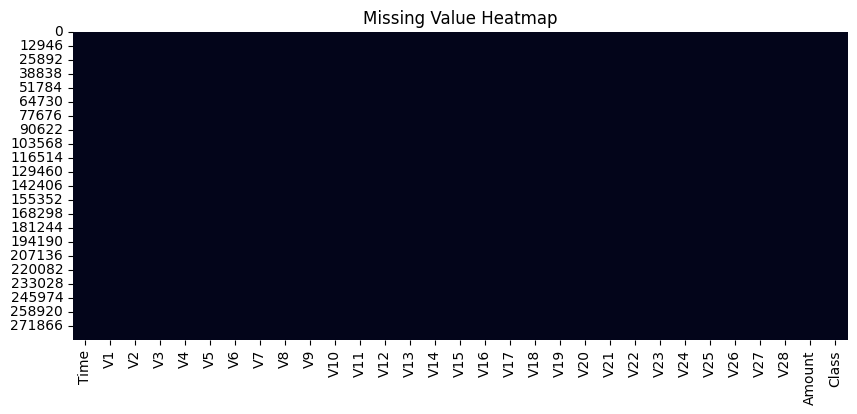

In [4]:
#Missing Value Analysis
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()


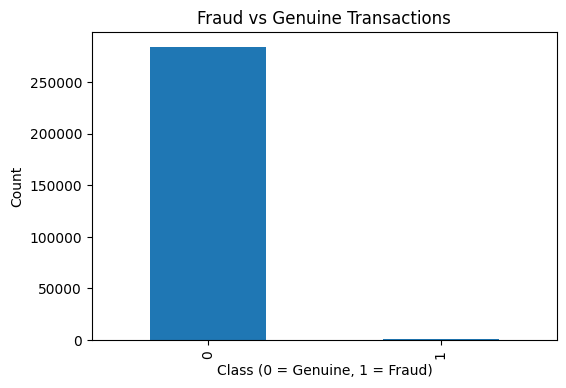

In [5]:
#Target Variable Distribution (Class Imbalance)
plt.figure(figsize=(6,4))
df['Class'].value_counts().plot(kind='bar')
plt.title("Fraud vs Genuine Transactions")
plt.xlabel("Class (0 = Genuine, 1 = Fraud)")
plt.ylabel("Count")
plt.show()


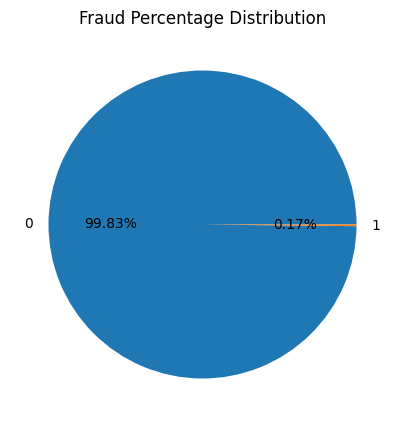

In [6]:
#Class Percentage Pie Chart
plt.figure(figsize=(5,5))
df['Class'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("Fraud Percentage Distribution")
plt.ylabel("")
plt.show()


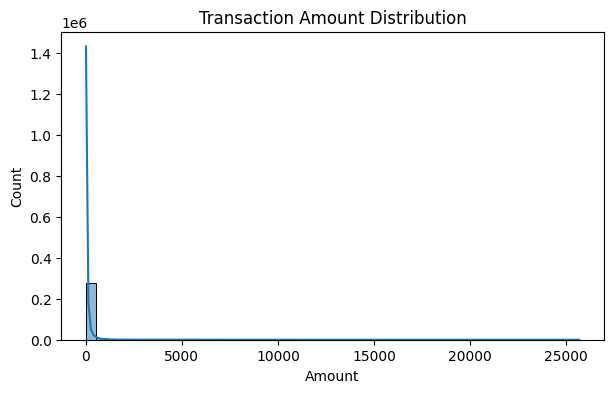

In [7]:
#Transaction Amount Distribution
plt.figure(figsize=(7,4))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.show()



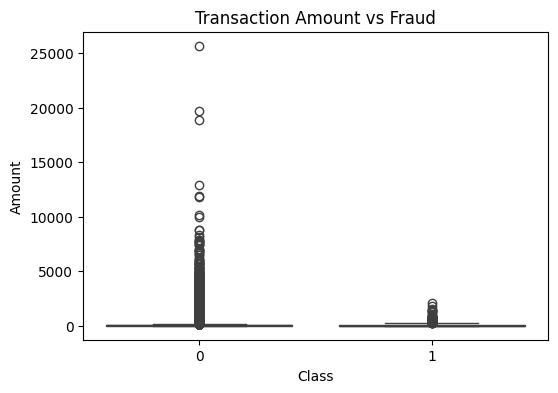

In [8]:
#Amount vs Fraud (Boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amount vs Fraud")
plt.show()



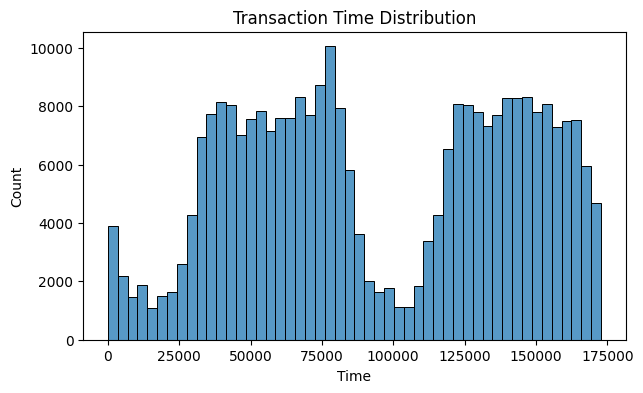

In [9]:
#Time-Based Analysis
if 'Time' in df.columns:
    plt.figure(figsize=(7,4))
    sns.histplot(df['Time'], bins=50)
    plt.title("Transaction Time Distribution")
    plt.show()



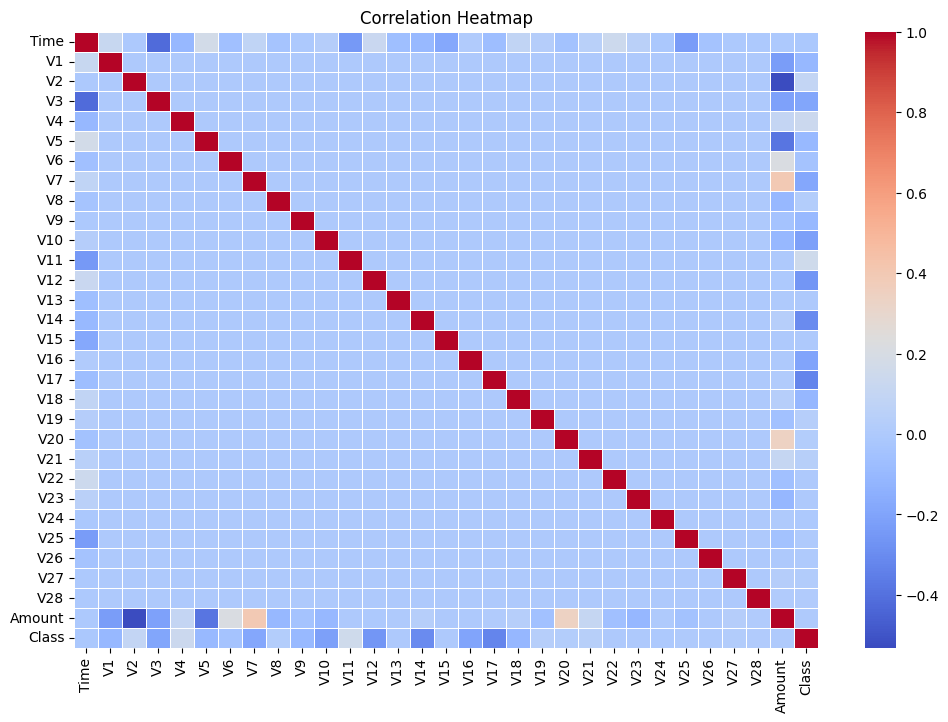

In [10]:
#Feature Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
#Pair Plot
# sample_df = df.sample(2000, random_state=42)
# sns.pairplot(sample_df, hue='Class')
# plt.show()


In [11]:
#Feature & Target Split
X = df.drop("Class", axis=1)
y = df["Class"]


In [12]:
#Encoding Categorical Variables
X = pd.get_dummies(X, drop_first=True)


In [13]:
#Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [14]:
#Feature Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
#KNN CLASSIFIER
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)


In [16]:
#KNN Metrics
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Precision:", precision_score(y_test, y_pred_knn))
print("KNN Recall:", recall_score(y_test, y_pred_knn))
print("KNN F1:", f1_score(y_test, y_pred_knn))


KNN Accuracy: 0.9995435553526912
KNN Precision: 0.9186046511627907
KNN Recall: 0.8061224489795918
KNN F1: 0.8586956521739131


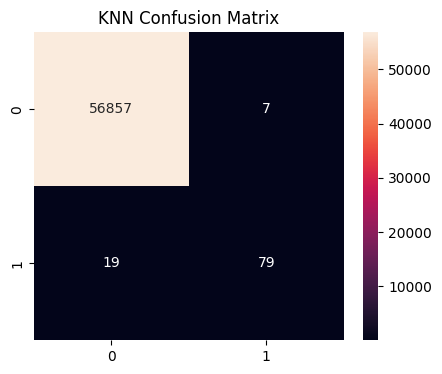

In [17]:
#KNN Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn),
            annot=True, fmt='d')
plt.title("KNN Confusion Matrix")
plt.show()


In [18]:
#K-MEANS CLUSTERING
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled)

kmeans_pred = kmeans.predict(X_test_scaled)


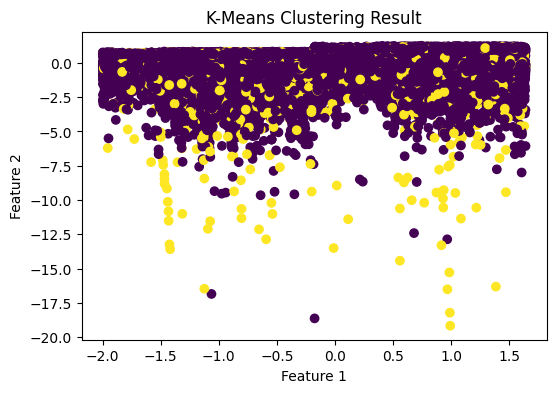

In [19]:
#K-Means Cluster Scatter Plot
plt.figure(figsize=(6,4))
plt.scatter(X_test_scaled[:,0],
            X_test_scaled[:,1],
            c=kmeans_pred)
plt.title("K-Means Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [20]:
#DECISION TREE CLASSIFIER
dt = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [21]:
#Decision Tree Metrics
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Precision:", precision_score(y_test, y_pred_dt))
print("Decision Tree Recall:", recall_score(y_test, y_pred_dt))
print("Decision Tree F1:", f1_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9994557775359011
Decision Tree Precision: 0.8941176470588236
Decision Tree Recall: 0.7755102040816326
Decision Tree F1: 0.8306010928961749


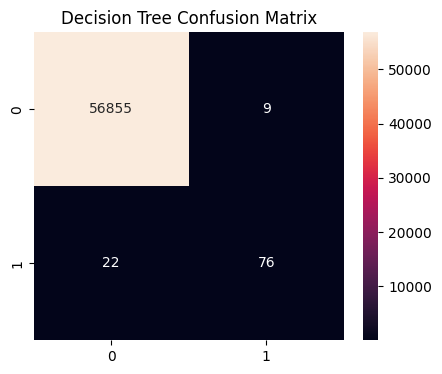

In [22]:
#Decision Tree Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt),
            annot=True, fmt='d')
plt.title("Decision Tree Confusion Matrix")
plt.show()


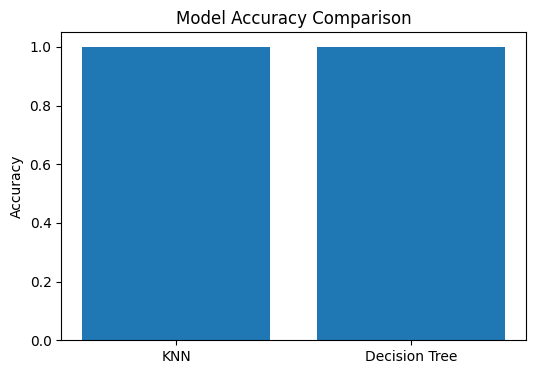

In [23]:
#Accuracy Comparison Plot
models = ['KNN', 'Decision Tree']
accuracies = [
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_dt)
]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


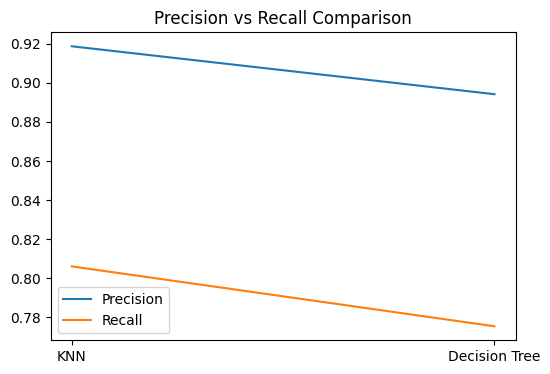

In [24]:
#Precision–Recall Comparison
precision = [
    precision_score(y_test, y_pred_knn),
    precision_score(y_test, y_pred_dt)
]

recall = [
    recall_score(y_test, y_pred_knn),
    recall_score(y_test, y_pred_dt)
]

plt.figure(figsize=(6,4))
plt.plot(models, precision, label="Precision")
plt.plot(models, recall, label="Recall")
plt.legend()
plt.title("Precision vs Recall Comparison")
plt.show()
